In [1]:
# The modules we're going to use
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, convolutional, pooling, Flatten, Dropout
from keras.optimizers import Adam

import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load mnist data
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train[:1000]
y_train = y_train[:1000]

print('Before pre-processing, X_train size: ', X_train.shape)
print('Before pre-processing, y_train size: ', y_train.shape)
print('Before pre-processing, X_test size: ', X_test.shape)
print('Before pre-processing, y_test size: ', y_test.shape)

# Pre-processing
X_train = X_train.reshape(-1,1, 28,28)
X_test = X_test.reshape(-1,1, 28,28)
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print('After pre-processing, X_train size: ', X_train.shape)
print('After pre-processing, y_train size: ', y_train.shape)
print('After pre-processing, X_test size: ', X_test.shape)
print('After pre-processing, y_test size: ', y_test.shape)

Before pre-processing, X_train size:  (1000, 28, 28)
Before pre-processing, y_train size:  (1000,)
Before pre-processing, X_test size:  (10000, 28, 28)
Before pre-processing, y_test size:  (10000,)
After pre-processing, X_train size:  (1000, 1, 28, 28)
After pre-processing, y_train size:  (1000, 10)
After pre-processing, X_test size:  (10000, 1, 28, 28)
After pre-processing, y_test size:  (10000, 10)


In [3]:
# Create a neural net
model = Sequential()

# Define dropout rate
dprate = 0.5;

# Add convolutional layer
model.add(convolutional.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1, 1),
    padding='same',     #padding_method
    input_shape=(1,28,28),  # channels
    activation='relu',
))

# Add max-pooling layer
model.add(pooling.MaxPooling2D(
    pool_size=(2, 2),
    padding='same', #padding_method
))

# Add 2nd convolutional layer and max-pooling layer
model.add(convolutional.Conv2D(64,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2),padding='same'))

# Add 3rd convolutional layer and max-pooling layer
model.add(convolutional.Conv2D(128,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2),padding='same'))

# Add flatten layer and fully connected layer
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(dprate))

# Add one more fully connected layer with softmax activation function
model.add(Dense(10))
model.add(Activation('softmax'))

In [4]:
# Specify an optimizer to use
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Choose loss function, optimization method, and metrics (which results to display)
model.compile(
    optimizer = adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=2)

# Testing
loss, accuracy = model.evaluate(X_test,y_test,verbose=2)
print('test loss:', loss)
print('test accuracy', accuracy)

Epoch 1/10
2s - loss: 1.9722 - acc: 0.4740
Epoch 2/10
1s - loss: 0.5448 - acc: 0.8290
Epoch 3/10
1s - loss: 0.2769 - acc: 0.9180
Epoch 4/10
1s - loss: 0.1375 - acc: 0.9560
Epoch 5/10
1s - loss: 0.1209 - acc: 0.9610
Epoch 6/10
1s - loss: 0.0704 - acc: 0.9740
Epoch 7/10
1s - loss: 0.0301 - acc: 0.9930
Epoch 8/10
1s - loss: 0.0142 - acc: 0.9950
Epoch 9/10
1s - loss: 0.0060 - acc: 1.0000
Epoch 10/10
1s - loss: 0.0099 - acc: 0.9970
test loss: 0.312593287486
test accuracy 0.9209


[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[[  1.89092440e-11   1.10283347e-08   1.60929980e-04   7.74077398e-06
    2.00370814e-11   1.36000960e-10   1.45133263e-11   9.99830008e-01
    1.31233401e-06   4.36853220e-09]]


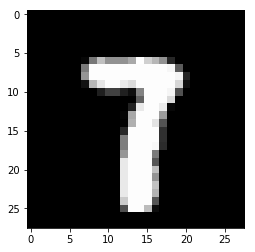

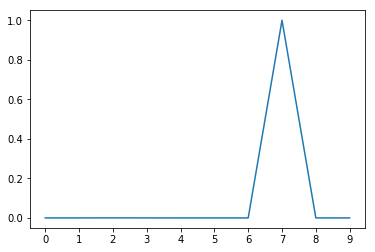

In [10]:
# Show the image of one testing example
temp = np.random.randint(y_test.shape[0],size=1)
plt.imshow(X_test[temp[0],0,:,:],cmap='gray')

# Display its target
print(y_test[temp[0]])

# Get its prediction
output = model.predict(X_test[temp[0]].reshape(-1,1, 28,28))
print(output)
plt.figure()
plt.xticks(np.arange(output.shape[1]))
plt.plot(np.arange(output.shape[1]),output.T)